# IMAGE RECOGNITION BY USE OF DIMENSIONALITY REDUCTION
## (UNSUPERVISED LEARNING)

## 1. INTRODUCTORY
- ### 1.a. Brief Information
- ### 1.b. Aim of Work

## 2. DIMENSIONALITY REDUCTION
- ### 2.a. PCA
- ### 2.b. t-SNE (2 different variations)
- ### 2.c. GRP
- ### 2.d. MDS
- ### 2.e. ISOMAP

## 3. CLUSTERING
- ### 3.a. K-Means
- ### 3.b. Hierarchial (Agglomerative)
- ### 3.c. DBSCAN
- ### 3.d. GMM (Gaussian Mixture Model)

## 4. RESULTS

#### ------------------------------------------------------------------------------------------------

## 1. INTRODUCTORY

### 1.a. Brief Information

This dataset is created as a benchmark dataset for the work on Effects of Degradations on Deep Neural Network Architectures. This dataset contains 2000 images from 8 distinct classes compiled from various sources.

The classes include airplane, car, cat, dog, flower, fruit, motorbike and person. Each contains 250 pictures. So, it is a balanced dataset.

### 1.b. Aim of Work

This unsupervised machine learning project aims to predict which object the pictures contain. While, dimensionality reduction techniques are going to be used. Then, pictures are going to be clustered as well. According to some measurements, performances are going to be compared which one is the best.

In [1]:
# DEFINITIONS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics

In [2]:
# FUNCTION FOR LABELING IMAGES

def write_type(img):
    names=["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]
    for i, types in enumerate(names):
        if types in img:
            return i

In [3]:
# PATH OF IMAGES

path="./images/"

In [38]:
# READING, RESIZING, LABELING AND WRITING TO DATAFRAME

images_tmp=pd.DataFrame()
values=pd.DataFrame()

for i, img in enumerate(os.listdir(path)):
  
    img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    img_array=cv2.resize(img_array, (100,100))
    img_array=img_array.reshape(1,10000)
    
    values[i]=img_array[0]
    
    images_tmp=images_tmp.append({  "img_name":img,
                                    "type":write_type(img)},
                                    ignore_index="True")
    
values=values.T
images=pd.concat([images_tmp, values], axis=1).reindex(images_tmp.index)

del img_array, images_tmp

- Let's check whether we have done the things right.

In [37]:
plt.imshow(np.resize(images.iloc[0:1,2:], (100,100)), cmap="gray")
plt.show()

NameError: name 'images' is not defined

In [6]:
# CODE FOR INTERACTIVE 3D GRAPHICS

%matplotlib notebook

## 2. DIMENSIONALITY REDUCTION

In [7]:
X_tmp=images.iloc[:,2:]

### 2.a. PCA

In [8]:
X=PCA(n_components=100).fit_transform(X_tmp)
pca=X

<IPython.core.display.Javascript object>


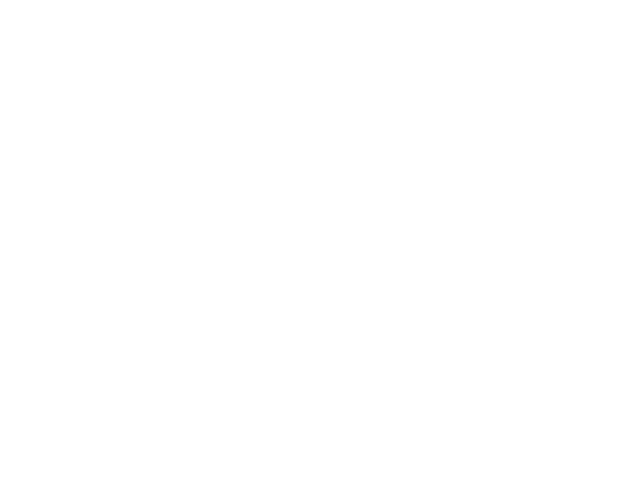

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

ax.scatter(X.T[0], X.T[1], X.T[2])
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

A group seperates from others along the X-axis.

### 2.b. t-SNE (v.1)

Due to taking so long time, it was run once and written to a .csv file. Now, values are read from the file.

In [10]:
tsne1=pd.read_csv("tsne1.csv")

<IPython.core.display.Javascript object>


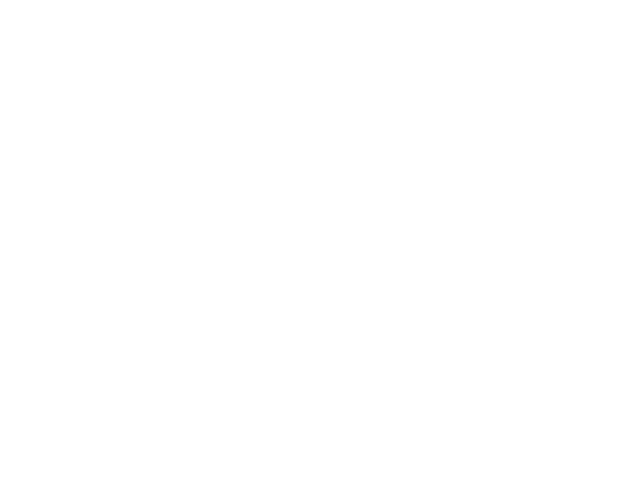

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

ax.scatter(np.array(tsne1["0"]), np.array(tsne1["1"]), np.array(tsne1["2"]))
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

Some little groups flock together, but graphic does not give much idea.

### 2.b. t-SNE (v.2)

Also this one was run once and now read from the file.

In [12]:
tsne2=pd.read_csv("tsne2.csv")

<IPython.core.display.Javascript object>


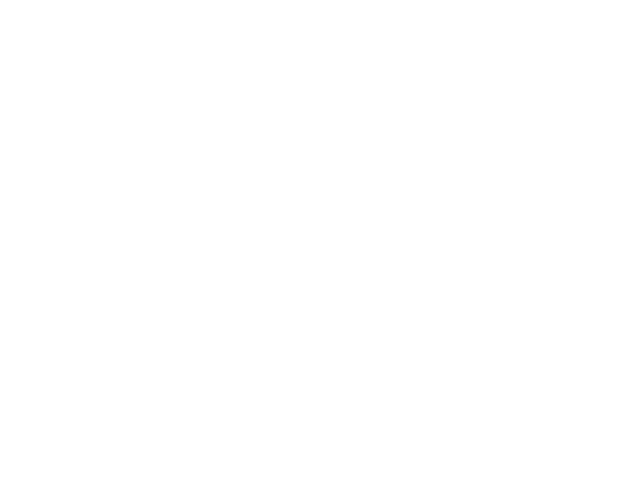

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

ax.scatter(np.array(tsne2["0"]), np.array(tsne2["1"]), np.array(tsne2["2"]))
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

It is too hard to say anything about groups.

### 2.c. GRP

In [14]:
grp = GaussianRandomProjection(n_components=3,eps = 0.5, random_state=286).fit_transform(X)

<IPython.core.display.Javascript object>


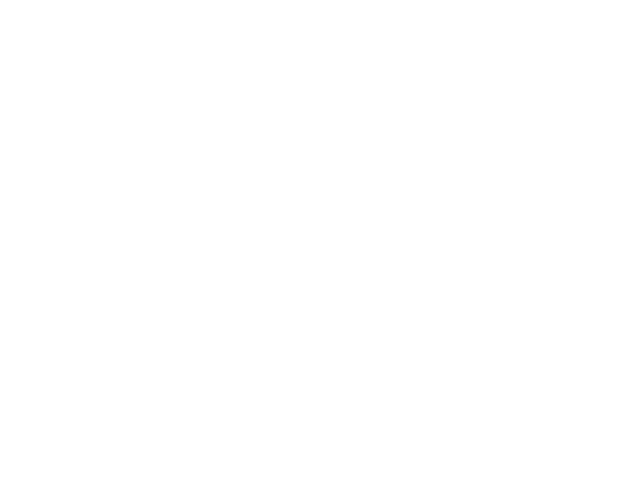

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

ax.scatter(grp.T[0], grp.T[1], grp.T[2])
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

Also this one gives no idea about groups.

### 2.d. MDS

In [16]:
mds = MDS(n_components=3, n_init=2, max_iter=50, metric=True, n_jobs=4, 
          random_state=286, dissimilarity="euclidean").fit_transform(X)

<IPython.core.display.Javascript object>


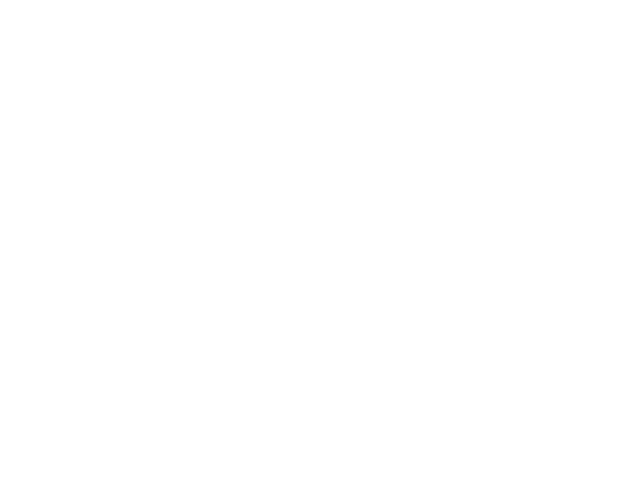

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

ax.scatter(mds.T[0], mds.T[1], mds.T[2])
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

No idea...

### 2.e. ISOMAP

In [18]:
isomap = Isomap(n_components=3, n_jobs=4, n_neighbors=5).fit_transform(X)

<IPython.core.display.Javascript object>


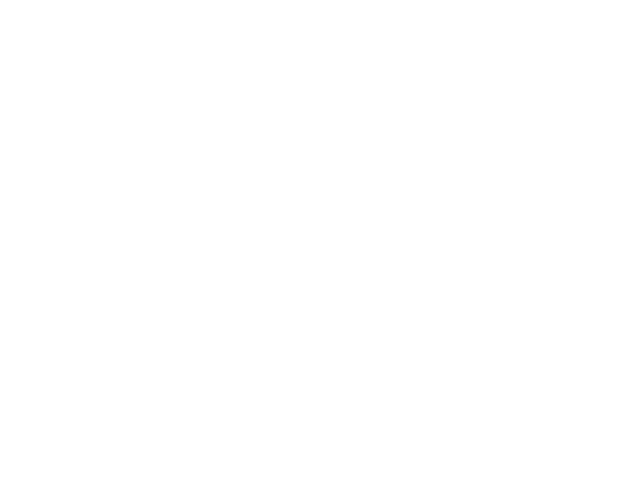

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

ax.scatter(isomap.T[0], isomap.T[1], isomap.T[2])
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

Some groups distincts from others. This may be useful.

## 3. CLUSTERING

Dimensionality reduction is done. Now, picture data can easily be used. From now on, algoritms are going to try to group them. Let's check them.

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [21]:
cluster_2k=pd.DataFrame()
cluster_2k["real_type"]=images["type"]

In [22]:
# Deleting unnecessarily memory using variables

del X_tmp, images

### 3.a. K-Means

In [23]:
# Clustering
kmeans_pca=KMeans(n_clusters=8, random_state=286).fit_predict(pca)

kmeans_tsne1=KMeans(n_clusters=8, random_state=286).fit_predict(tsne1)

kmeans_tsne2=KMeans(n_clusters=8, random_state=286).fit_predict(tsne2)

kmeans_grp=KMeans(n_clusters=8, random_state=286).fit_predict(grp)

kmeans_mds=KMeans(n_clusters=8, random_state=286).fit_predict(mds)

kmeans_isomap=KMeans(n_clusters=8, random_state=286).fit_predict(isomap)

# Registering Results to DataFrame
cluster_2k["kmeans_pca"]=kmeans_pca

cluster_2k["kmeans_tsne1"]=kmeans_tsne1

cluster_2k["kmeans_tsne2"]=kmeans_tsne2

cluster_2k["kmeans_grp"]=kmeans_grp

cluster_2k["kmeans_mds"]=kmeans_mds

cluster_2k["kmeans_isomap"]=kmeans_isomap

# Deleting Clustering Results (to save memory)
del kmeans_pca, kmeans_tsne1, kmeans_tsne2, kmeans_grp, kmeans_mds, kmeans_isomap

### 3.b. Hierarchial (Agglomerative)

In [24]:
# Clustering
agglo_pca=AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=8).fit_predict(pca)

agglo_tsne1=AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=8).fit_predict(tsne1)

agglo_tsne2=AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=8).fit_predict(tsne2)

agglo_grp=AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=8).fit_predict(grp)

agglo_mds=AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=8).fit_predict(mds)

agglo_isomap=AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=8).fit_predict(isomap)

# Registering Results to DataFrame
cluster_2k["agglo_pca"]=agglo_pca

cluster_2k["agglo_tsne1"]=agglo_tsne1

cluster_2k["agglo_tsne2"]=agglo_tsne2

cluster_2k["agglo_grp"]=agglo_grp

cluster_2k["agglo_mds"]=agglo_mds

cluster_2k["agglo_isomap"]=agglo_isomap

# Deleting Clustering Results (to save memory)
del agglo_pca, agglo_tsne1, agglo_tsne2, agglo_grp, agglo_mds, agglo_isomap

### 3.c. DBSCAN

In [25]:
# Clustering
dbscan_pca=DBSCAN(eps=4, min_samples=4).fit_predict(pca)

dbscan_tsne1=DBSCAN(eps=4, min_samples=4).fit_predict(tsne1)

dbscan_tsne2=DBSCAN(eps=4, min_samples=4).fit_predict(tsne2)

dbscan_grp=DBSCAN(eps=4, min_samples=4).fit_predict(grp)

dbscan_mds=DBSCAN(eps=4, min_samples=4).fit_predict(mds)

dbscan_isomap=DBSCAN(eps=4, min_samples=4).fit_predict(isomap)

# Registering Results to DataFrame
cluster_2k["dbscan_pca"]=dbscan_pca

cluster_2k["dbscan_tsne1"]=dbscan_tsne1

cluster_2k["dbscan_tsne2"]=dbscan_tsne2

cluster_2k["dbscan_grp"]=dbscan_grp

cluster_2k["dbscan_mds"]=dbscan_mds

cluster_2k["dbscan_isomap"]=dbscan_isomap

# Deleting Clustering Results (to save memory)
del dbscan_pca, dbscan_tsne1, dbscan_tsne2, dbscan_grp, dbscan_mds, dbscan_isomap

### 3.d. GMM (Gaussian Mixture Model)

In [26]:
# Clustering
gmm_pca=GaussianMixture(n_components=8, random_state=286).fit_predict(pca)

gmm_tsne1=GaussianMixture(n_components=8, random_state=286).fit_predict(tsne1)

gmm_tsne2=GaussianMixture(n_components=8, random_state=286).fit_predict(tsne2)

gmm_grp=GaussianMixture(n_components=8, random_state=286).fit_predict(grp)

gmm_mds=GaussianMixture(n_components=8, random_state=286).fit_predict(mds)

gmm_isomap=GaussianMixture(n_components=8, random_state=286).fit_predict(isomap)

# Registering Results to DataFrame
cluster_2k["gmm_pca"]=gmm_pca

cluster_2k["gmm_tsne1"]=gmm_tsne1

cluster_2k["gmm_tsne2"]=gmm_tsne2

cluster_2k["gmm_grp"]=gmm_grp

cluster_2k["gmm_mds"]=gmm_mds

cluster_2k["gmm_isomap"]=gmm_isomap

# Deleting Clustering Results (to save memory)
del gmm_pca, gmm_tsne1, gmm_tsne2, gmm_grp, gmm_mds, gmm_isomap

## 4. RESULTS

- Real classes of pictures can be used to measure the model accuraccies.
- Note that the model can classify a type with another number. If it is consistent to classify the same types of pictures with the same number, that is what we want and it is useful. Otherwise, it is almost impossible to determine.

In [27]:
%matplotlib inline

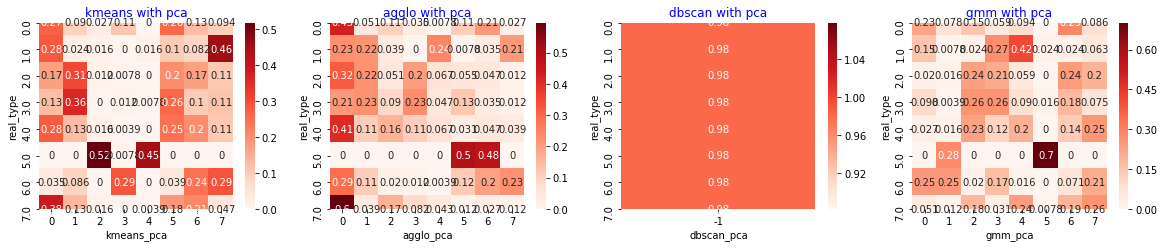

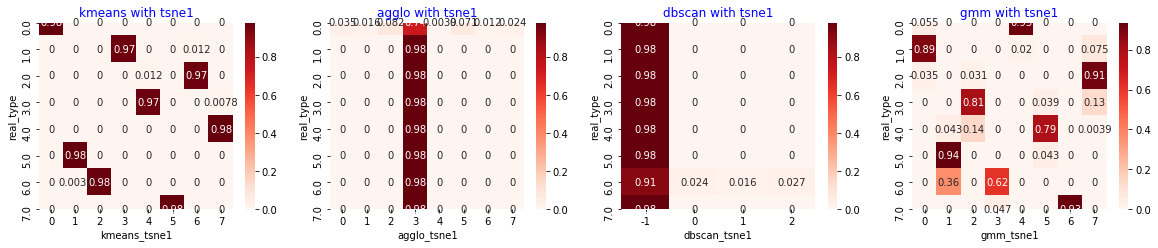

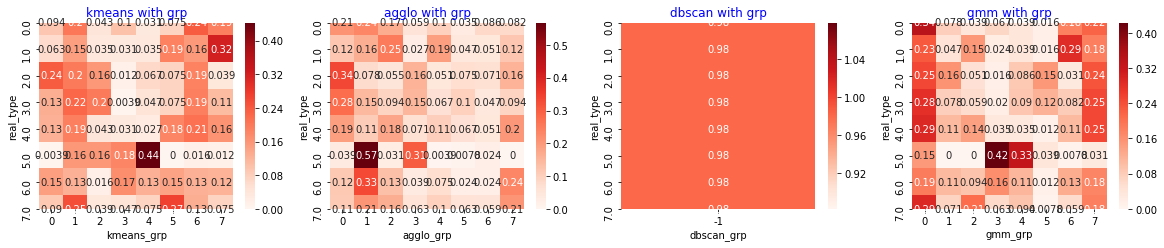

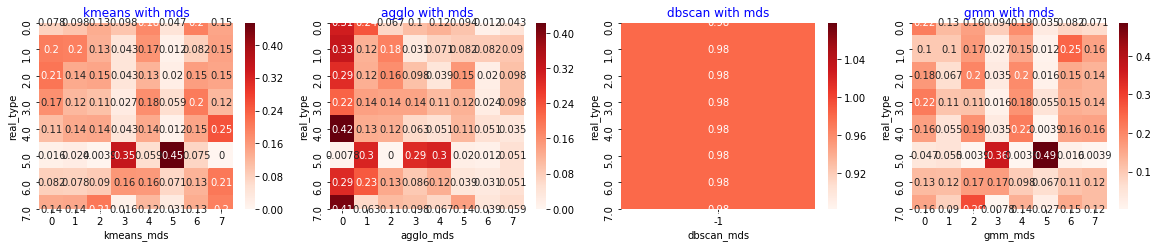

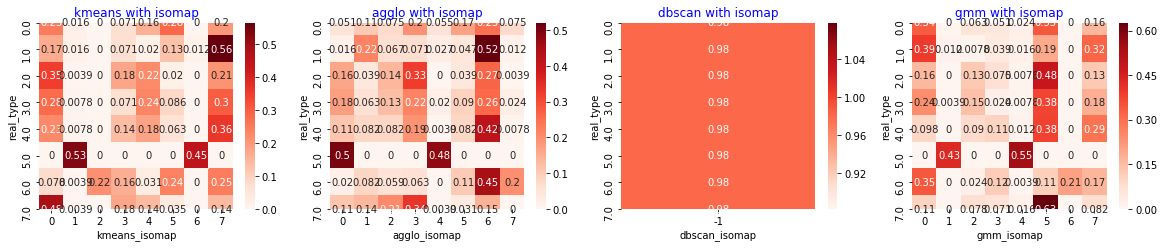

In [64]:
clust_methods=["kmeans", "agglo", "dbscan", "gmm"]
dim_methods=["pca", "tsne1", "grp", "mds", "isomap"]
count=1

for dim in dim_methods:
    plt.figure(figsize=(20,24))
    
    for i, cls in enumerate(clust_methods):
        cross=pd.crosstab(cluster_2k["real_type"], cluster_2k[cls+"_"+dim])/255
        
        plt.subplot(6,4,count)
        sns.heatmap(cross, annot=True, cmap="Reds")
        plt.title(cls+" with "+dim, color="blue")
        
        count+=1
        
plt.tight_layout
plt.show()

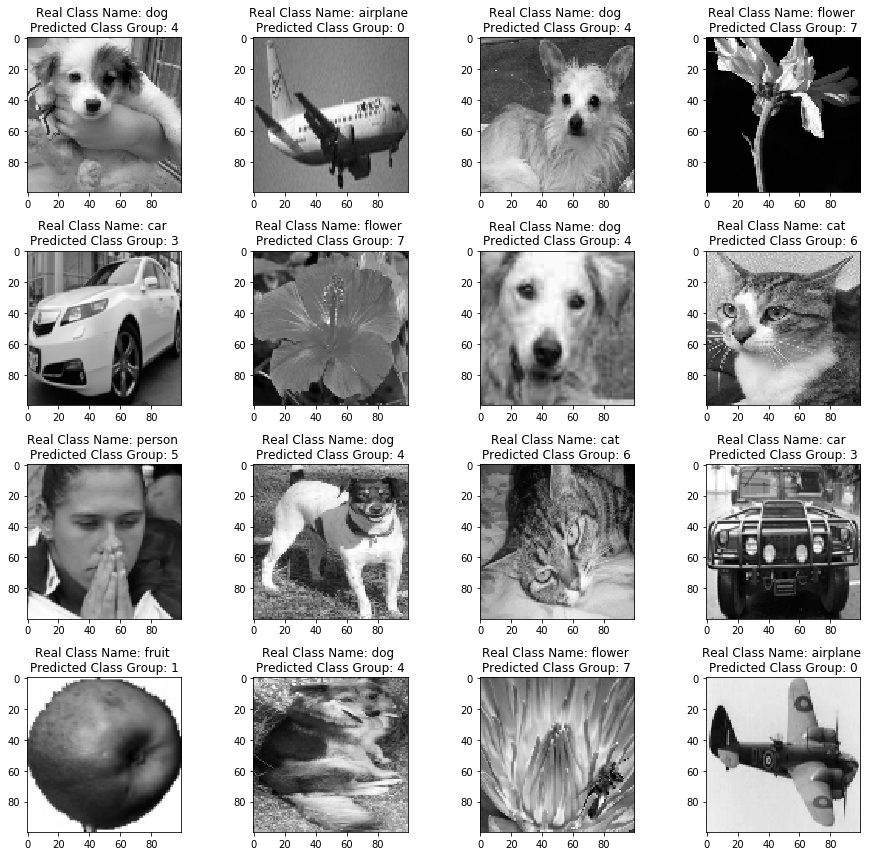

In [98]:
names=["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]

def clust_name(img, list=names):
    for i, types in enumerate(list):
        if types in img:
            return types
        

random_nums=np.random.randint(len(cluster_2k), size=16)

fig=plt.figure(figsize=(14, 12))

for i, val in enumerate(random_nums):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(np.resize(images.iloc[val:val+1,2:], (100,100)), cmap="gray")
    plt.title("Real Class Name: {} \nPredicted Class Group: {}".format(
        clust_name(images["img_name"][val]), cluster_2k["kmeans_tsne1"][val]))
    plt.tight_layout()

plt.show()

According to heatmaps above;
- DBSCAN has done the worst job. For this type of datasets, it is not useful.
- Except with PCA reduction, K-Means and GMM do approximately the same jobs. K-Means is a little bit better.
- With use of t-SNE reductions, all algoritms tend to end up distinct results.
- First version of t-SNE wins by nose.

K-Means with t-SNE reductions gives best results.

Let's have a glance on metrics.

In [29]:
result=pd.DataFrame(columns=["t-SNE 1", "t-SNE 2"], index=["Accuracy", "#Falses", "ARI", "Silhouette"])

result["t-SNE 1"]["Accuracy"]=0.964 # Sum of crosstab values
result["t-SNE 2"]["Accuracy"]=0.790 # Sum of crosstab values

result["t-SNE 1"]["#Falses"]=(1-0.964)*2000
result["t-SNE 2"]["#Falses"]=(1-0.790)*2000

result["t-SNE 1"]["ARI"]=metrics.adjusted_rand_score(cluster_2k["real_type"], cluster_2k["kmeans_tsne1"])
result["t-SNE 2"]["ARI"]=metrics.adjusted_rand_score(cluster_2k["real_type"], cluster_2k["kmeans_tsne2"])

result["t-SNE 1"]["Silhouette"]=metrics.silhouette_score(X, cluster_2k["kmeans_tsne1"], metric="euclidean")
result["t-SNE 2"]["Silhouette"]=metrics.silhouette_score(X, cluster_2k["kmeans_tsne2"], metric="euclidean")

result

,t-SNE 1,t-SNE 2
Accuracy,0.964,0.79
#Falses,72,420
ARI,0.989765,0.943318
Silhouette,0.0133519,0.0144574


### For this image dataset:
All metrics discloses those;
- t-SNE (also first version's hyperparameters) is the most appropriate dimensionality reduction algoritm,
- K-Means is the most appropriate clustering algoritm.